<a href="https://colab.research.google.com/github/kruho/colab/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTデータをダウンロードする

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [190]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

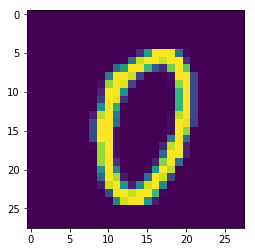

In [191]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1000])

# データの前処理

In [192]:
x_train.min(), x_train.max()

(0, 255)

In [0]:
x_train = x_train / 255.
x_test = x_test / 255.

In [194]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [0]:
x_train = x_train.reshape((60000,28,28,1))

In [0]:
x_test = x_test.reshape((10000,28,28,1))

In [0]:
import copy

x_input_train = copy.deepcopy(x_train[:50000])
x_output_train = copy.deepcopy(x_train[:50000])

x_input_val = copy.deepcopy(x_train[50000:])
x_output_val = copy.deepcopy(x_train[50000:])

x_input_test = copy.deepcopy(x_test)
x_output_test = copy.deepcopy(x_test)

In [0]:
import numpy as np
import cv2

# Denoising
#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 0.5
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 0.5
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 0.5

#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 5.
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 5.
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 5.

# Inpainting
#x_input_train[:,:,:14,:] = np.random.random(size=[50000,28,14,1])
#x_input_val[:,:,:14,:] = np.random.random(size=[10000,28,14,1])
#x_input_test[:,:,:14,:] = np.random.random(size=[10000,28,14,1])

# Superresolution
x_input_train = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_train]), -1)
x_input_val = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_val]), -1)
x_input_test = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_test]), -1)

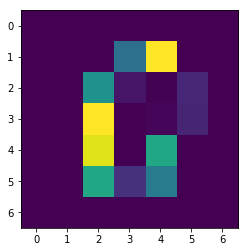

In [199]:
plt.imshow(x_input_train[1000].squeeze())

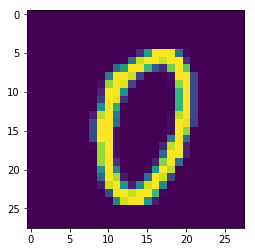

In [200]:
plt.imshow(x_output_train[1000].squeeze())

# ニューラルネットを作る

In [0]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, UpSampling2D

In [0]:
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
  
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if False:
  input_tensor = Input((28,28,1))
  
  nb_ch = 16
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)
  
  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if True:
  input_tensor = Input((7,7,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(64, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)
  
  output_tensor = Activation('sigmoid')(h)

In [0]:
from keras.models import Model

auto_encoder = Model(input_tensor, output_tensor)

In [0]:
auto_encoder.compile(loss='mse', optimizer='adam')

In [205]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 7, 7, 1)           0         
_________________________________________________________________
activation_67 (Activation)   (None, 7, 7, 1)           0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 7, 7, 1)           4         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 16)          160       
_________________________________________________________________
up_sampling2d_17 (UpSampling (None, 14, 14, 16)        0         
_________________________________________________________________
activation_68 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 14, 14, 16)        64        
__________

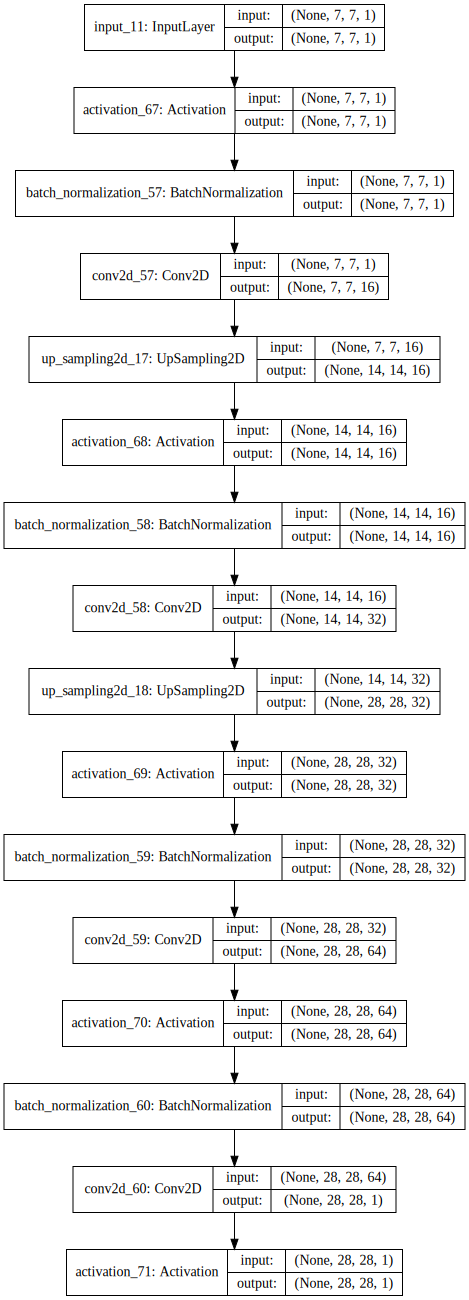

In [206]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(auto_encoder, show_shapes=True).create(prog='dot', format='svg'))

# 訓練する

In [207]:
hist = auto_encoder.fit(
    x = x_input_train,
    y = x_output_train,
    epochs = 20,
    batch_size=100,
    validation_data = (x_input_val, x_output_val),
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 182us/step - loss: 0.0374 - val_loss: 0.0261
Epoch 2/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0231 - val_loss: 0.0249
Epoch 3/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0212 - val_loss: 0.0210
Epoch 4/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 5/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0200 - val_loss: 0.0201
Epoch 6/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 7/20
50000/50000 [==============================] - 6s 130us/step - loss: 0.0193 - val_loss: 0.0194
Epoch 8/20
50000/50000 [==============================] - 6s 130us/step - loss: 0.0191 - val_loss: 0.0199
Epoch 9/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0189 - val_loss: 0.0

In [208]:
hist.history

{'loss': [0.03738710669800639,
  0.023092842299491167,
  0.02116747500002384,
  0.020345800295472144,
  0.019959027376025916,
  0.01959783297777176,
  0.01931060890480876,
  0.019112179812043904,
  0.018927318181842564,
  0.01876242046430707,
  0.018676119714975358,
  0.018548912964761258,
  0.018411193933337927,
  0.018323617435991764,
  0.01824568110704422,
  0.018184224892407657,
  0.01811786238476634,
  0.01804660711809993,
  0.01798537254706025,
  0.017940400026738645],
 'val_loss': [0.026073370277881622,
  0.024898720048367975,
  0.020993229411542417,
  0.020226605832576752,
  0.02012691890820861,
  0.019595658332109453,
  0.019366246331483126,
  0.019913708455860615,
  0.018998520765453577,
  0.019167754873633383,
  0.01889947697520256,
  0.018738201539963483,
  0.01852018032222986,
  0.01891198419034481,
  0.0186051213555038,
  0.018676424734294414,
  0.018361321557313202,
  0.018328038733452557,
  0.018211971782147885,
  0.018177621625363828]}

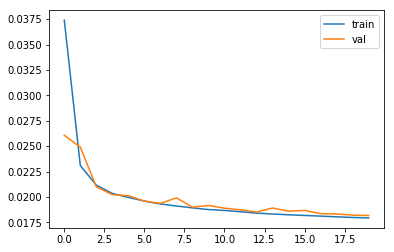

In [209]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
#plt.ylim(0.021, 0.024)

# テストする

In [0]:
pred = auto_encoder.predict(x_input_test)

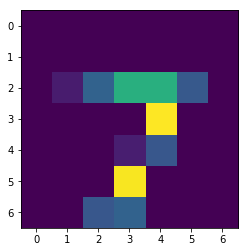

In [211]:
plt.imshow(x_input_test[0].squeeze())

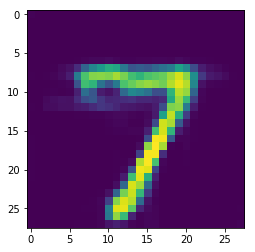

In [212]:
plt.imshow(pred[0].squeeze())

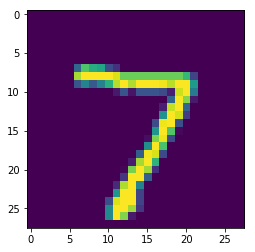

In [213]:
plt.imshow(x_output_test[0].squeeze())

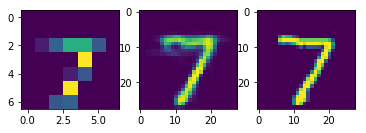

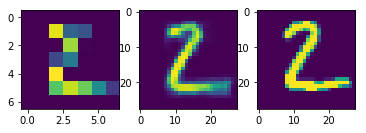

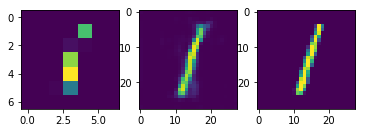

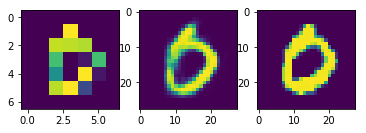

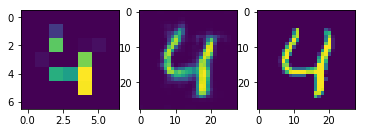

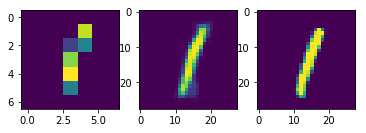

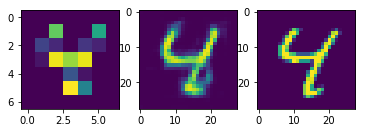

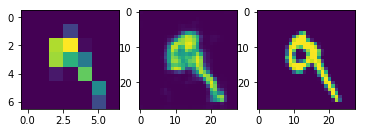

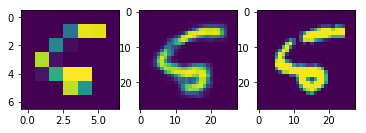

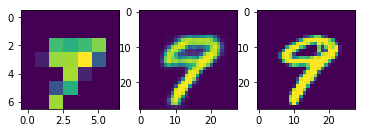

In [214]:
for x1,x2,x3 in zip(x_input_test[:10],pred[:10],x_output_test[:10]):
  plt.subplot(1,3,1)
  plt.imshow(x1.squeeze())
#  plt.clim(0,1)
  
  plt.subplot(1,3,2)
  plt.imshow(x2.squeeze())
  plt.clim(0,1)
  
  plt.subplot(1,3,3)
  plt.imshow(x3.squeeze())
  plt.clim(0,1)
  
  plt.show()
  